# Get and Normalize Video Game Database
> group member: Zili Huang, Jiabo Cheng <br>
> Github: <br>

## Abstract

We are working on a video game database with information gathered from giantbomb.com API. At first we will create a conceptual schema and a physical schema. Next, we will download the data in 1st NF and loaded into MySQL Server, and perform operations to get it in 2nd NF and 3rd NF. After auditing the data, we will answer the questions on assignment2 instruction and summarize in the report.

## Data
Data sources: https://www.giantbomb.com/forums/api-developers-3017/  <br>
Data consists of:
Detailed video game company information and video game information.<br>

## Create Conceptual Model:

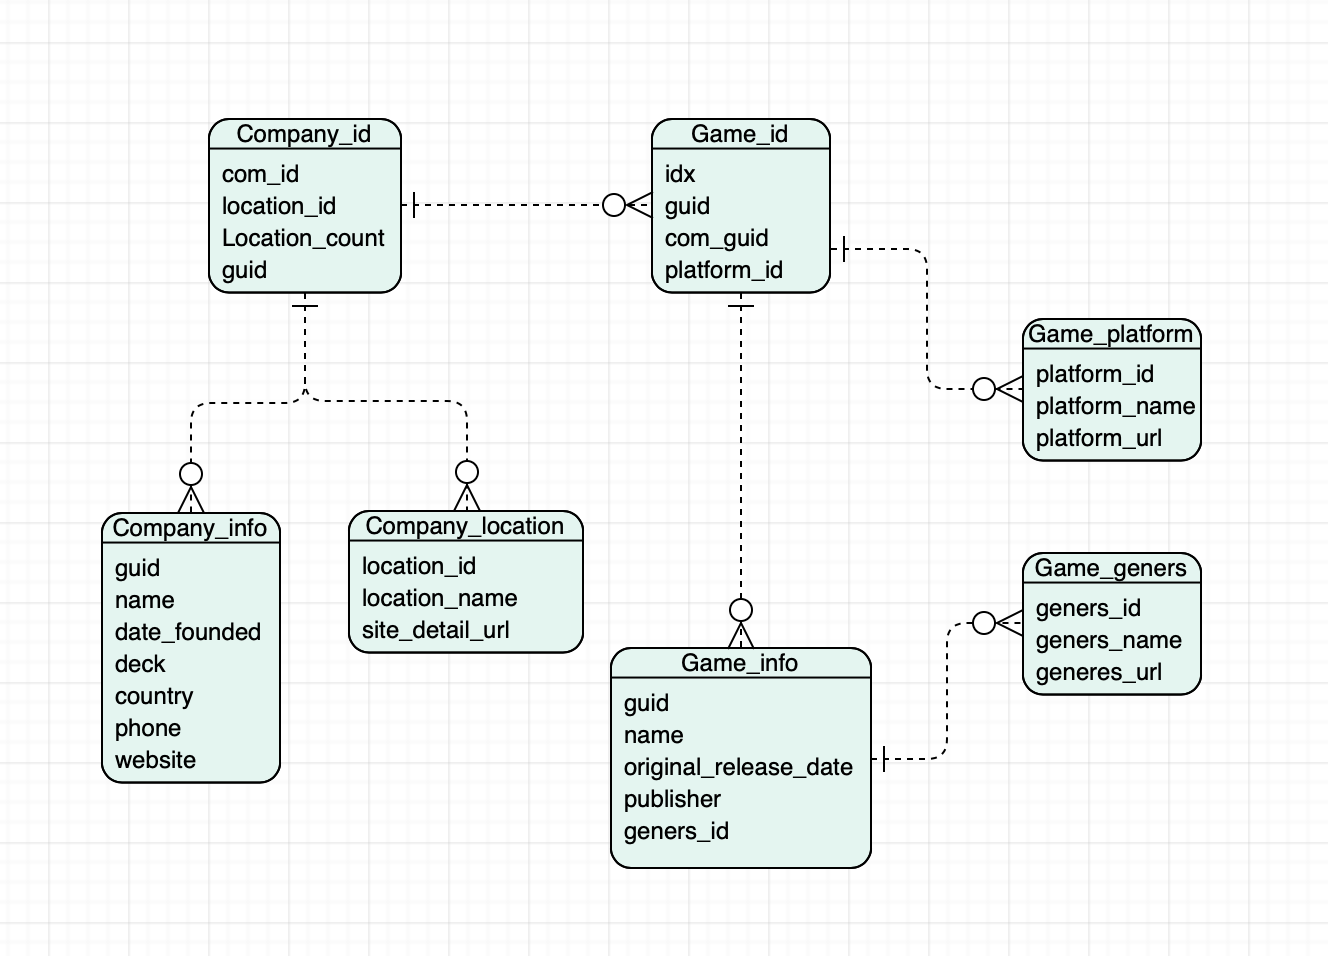

In [78]:
from IPython.display import Image
Image("Conceptual_model.png")

## Create Physical schema

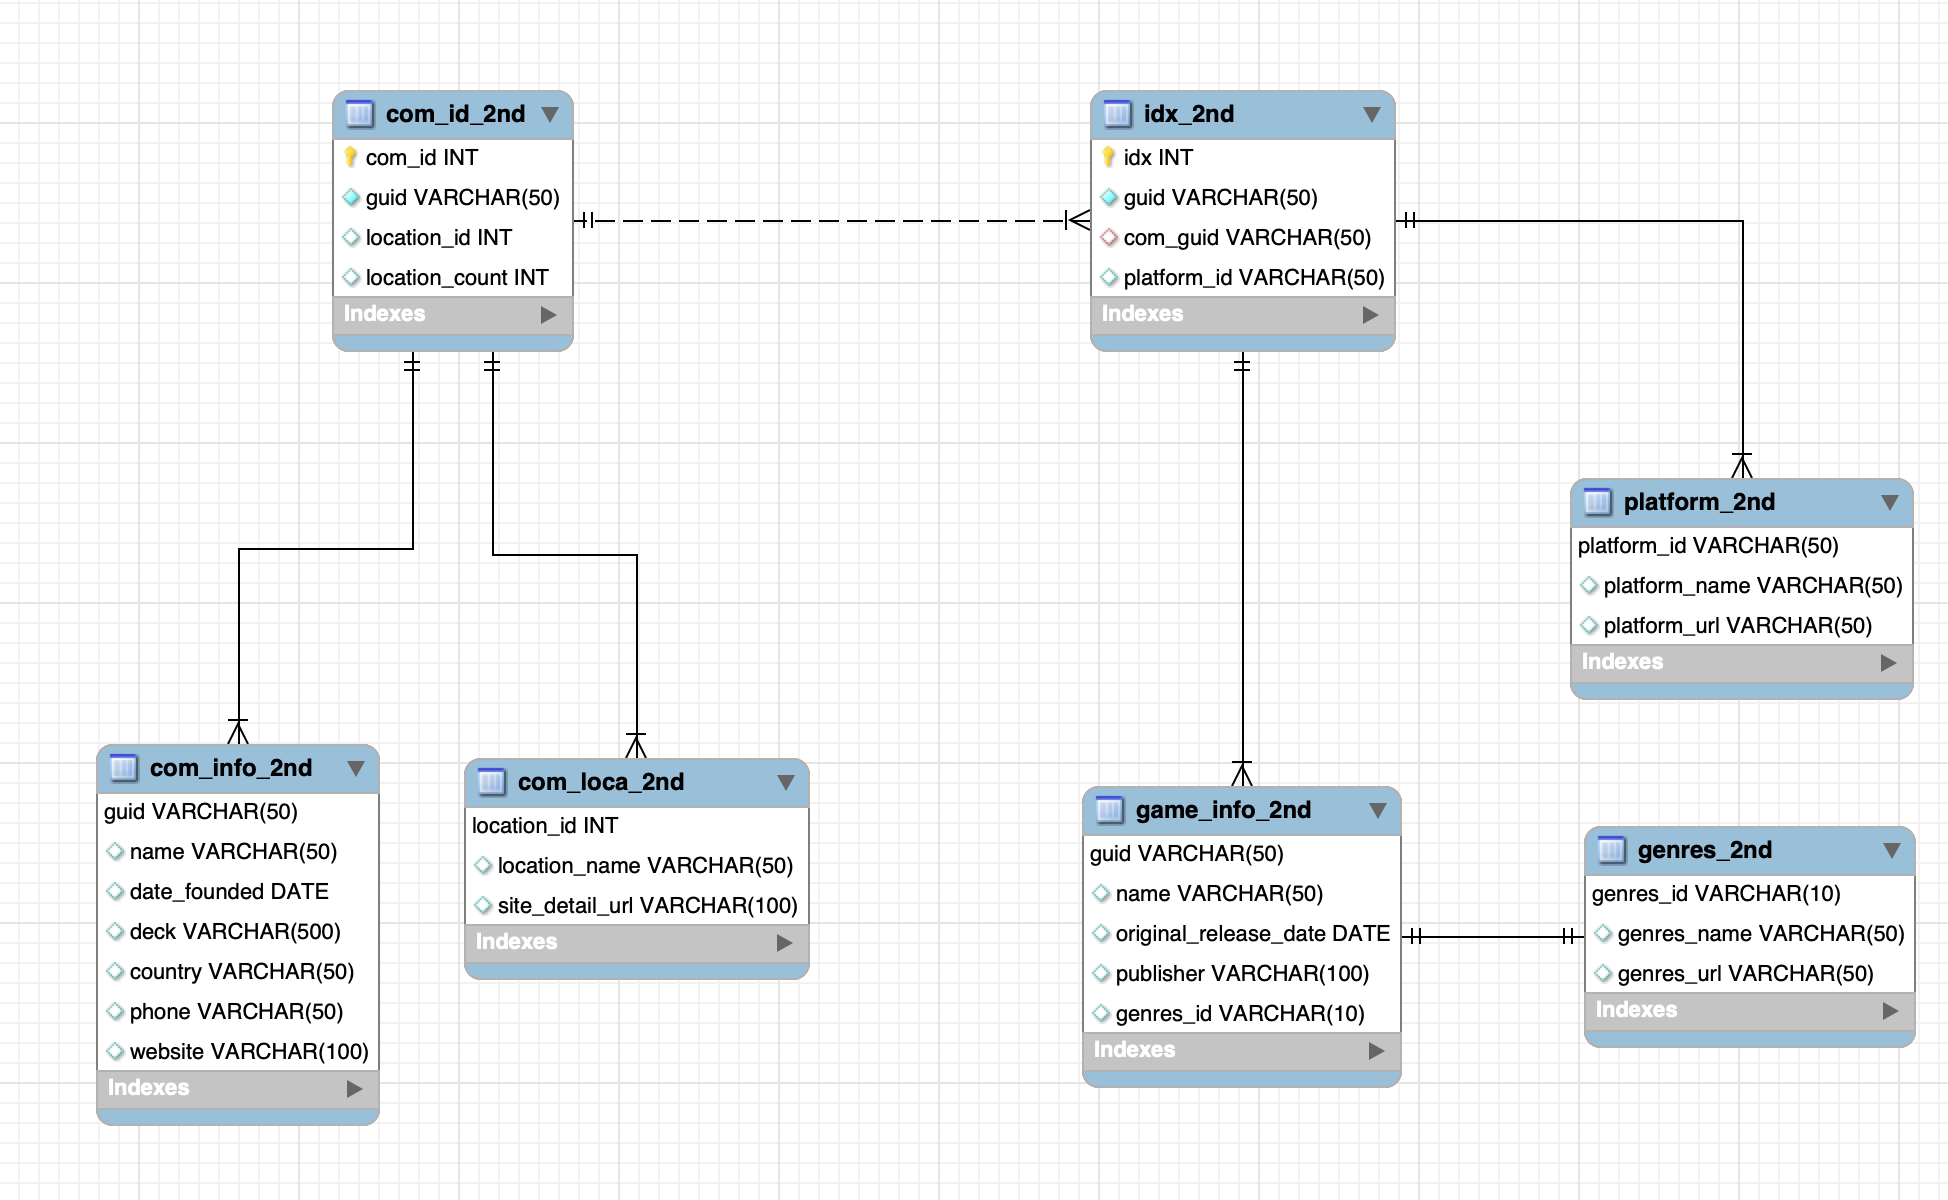

In [79]:
from IPython.display import Image
Image("Physical_model.png")

## Download data and reformat the data fo fit the conceptual schema.

### Import libraries

In [24]:
import urllib
import requests
import json
import csv
import pymysql
import pandas as pd

### Step 1: Fetch Video Game Company Information
#### Connect to MySql server at localhost, and create the table.

In [ ]:
db = pymysql.connect('localhost','root','mysql9299','game')
cursor = db.cursor()
cursor.execute("DROP TABLE IF EXISTS company")
sql = '''
    CREATE TABLE company(
    guid VARCHAR(50) NOT NULL,
    name VARCHAR(50),
    date_founded DATE,
    deck VARCHAR(500),
    country VARCHAR(50),
    phone VARCHAR(50),
    website VARCHAR(100),
    location_id INT,
    location_name VARCHAR(50),
    site_detail_url VARCHAR(100),
    location_count INT    
    )
'''
cursor.execute(sql)

#### Download companies list using API

In [88]:
user_agent = 'Mozilla/4.0 (compatible; MSIE 5.5; Windows NT)'
headers = {'User-Agent':user_agent,}
url = 'http://www.giantbomb.com/api/companies/?api_key=75a93f4b071b6002e1f328293149fb3cd166b91a&format=json&limit=50'
req = urllib.request.Request(url=url, headers=headers)
json_obj = urllib.request.urlopen(req)
data = json.load(json_obj)
show = str(data['results'][0])
print(show[:1000]+'...')

{'abbreviation': None, 'aliases': 'EA\r\nElectronic Arts Inc.', 'api_detail_url': 'https://www.giantbomb.com/api/company/3010-1/', 'date_added': '2008-04-01 01:32:48', 'date_founded': '1982-05-28 00:00:00', 'date_last_updated': '2016-06-27 22:31:41', 'deck': 'EA is one of the largest publisher/developers in the video game industry.', 'description': '<h2>Overview</h2><p>Electronic Arts is an American developer, publisher, marketer and distributor and is one of the largest video game companies in the world. <a data-ref-id="3040-18128" href="/trip-hawkins/3040-18128/">Trip Hawkins</a> founded the company in 1982 and was a pioneer in <a href="#" rel="nofollow">the video game</a> industry. When originally formed, EA was a publishing house, but slowly began to develop in-house games such as <a data-ref-id="3030-8819" href="/skate-or-die/3030-8819/">Skate or Die</a>. EA then began to purchase various developers, quickly becoming one of the largest publishers in the industry.</p><h2>History</h

#### List the companies returned:

In [89]:
for i in data['results']:
    print(i['name'])

Electronic Arts
The Hit Squad
Gremlin Interactive Ltd.
Delete
Domark Software
Telegames, Inc.
Software Storm, Inc.
Alawar Entertainment, Inc.
Kernel Kaput
The Software Toolworks
Software Country
Dro Soft
Simon & Schuster Interactive
Hypnotix, Inc.
THQ
Yuke's Co. Ltd.
Ariolasoft UK
Dinamic Software
SUNSOFT
Tokai Engineering
Halycon Media GmbH & Co. KG
ChessBase GmbH
Viva Media, LLC
Mindscape Entertainment
Centron Software, Inc.
Progressive Peripherals and Software
Whiptail Interactive
Pixel Studio
Akella
Dinamic Multimedia
n-Space, Inc.
Strategic Simulations, Inc.
Designer Software
dtp entertainment AG
Radon Labs GmbH
Agetec, Inc.
Max Design GesMBH
Shrapnel Games, Inc.
Tiny Hero Game Studios
Fox Interactive
Hyperbole Studios
Sony Interactive Entertainment Europe
ReadySoft Incorporated
Philips Interactive Media, Inc.
Don Bluth Ltd.
Digital Leisure Inc.
Positech Computing Ltd.
Deep Silver
Pluto 13 GmbH
JoWooD Productions Software AG


#### Get detailed company information and games they developed.

In [23]:
for i in data['results']:
    url_c = 'http://www.giantbomb.com/api/company/'+ str(i['guid'])+'/?api_key=75a93f4b071b6002e1f328293149fb3cd166b91a&format=json'
    req_c = urllib.request.Request(url=url_c, headers=headers)
    json_obj_c = urllib.request.urlopen(req_c)
    data_c = json.load(json_obj_c)
    res = data_c['results']
    print(res['guid'],res['name'],res['date_founded'],res['location_country'],res['phone'],res['website'],res['published_games'][0:5])
    break

3010-1 Electronic Arts 1982-05-28 00:00:00 USA 650-628-1500 http://www.ea.com [{'api_detail_url': 'https://www.giantbomb.com/api/game/3030-75845/', 'id': 75845, 'name': 'Battlefield (2021)', 'site_detail_url': 'https://www.giantbomb.com/battlefield-2021/3030-75845/'}, {'api_detail_url': 'https://www.giantbomb.com/api/game/3030-66000/', 'id': 66000, 'name': 'Star Wars Jedi: Fallen Order', 'site_detail_url': 'https://www.giantbomb.com/star-wars-jedi-fallen-order/3030-66000/'}, {'api_detail_url': 'https://www.giantbomb.com/api/game/3030-73586/', 'id': 73586, 'name': 'Need for Speed Heat', 'site_detail_url': 'https://www.giantbomb.com/need-for-speed-heat/3030-73586/'}, {'api_detail_url': 'https://www.giantbomb.com/api/game/3030-75048/', 'id': 75048, 'name': 'Plants vs. Zombies: Battle for Neighborville', 'site_detail_url': 'https://www.giantbomb.com/plants-vs-zombies-battle-for-neighborville/3030-75048/'}, {'api_detail_url': 'https://www.giantbomb.com/api/game/3030-73601/', 'id': 73601, 'n

#### Save published games into csv file for getting detailed game info later.

In [ ]:
for game in res['published_games'][1:5]:
    save = game['api_detail_url'],game['name'],res['guid'],res['name']
    print(save)
    with open('game.csv', 'a')as r:
        r_csv = csv.writer(r)
        r_csv.writerow(save)

#### Load company information into MySql Server.
Since the 'locations' is a multi-value attribute, we have to dupilicate rows and keep 'locations' atomic, to make the table satisfies the requirement of 1st NF.

In [ ]:
try:
    for location in res['locations']:
        sql = '''
        INSERT INTO company(
        guid, name, date_founded, deck, country, phone, website, location_id, location_name, site_detail_url, location_count   
        )
        VALUES('%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s')'''\
          % (res['guid'], res['name'], res['date_founded'], res['deck'], res['location_country'], res['phone'],res['website'],
           location['id'], location['name'], location['site_detail_url'], location['count'])


        cursor.execute(sql)
        db.commit()
except:
    print('error')

db.close()

In [91]:
db = pymysql.connect('localhost','root','mysql9299','game')
sql="SELECT * FROM company"

company_df=pd.read_sql(sql,db)
db.close()
company_df.head()

,idx,guid,name,date_founded,deck,country,phone,website,location_id,location_name,site_detail_url,location_count
0,1,3010-1,Electronic Arts,1982-05-28,EA is one of the largest publisher/developers ...,USA,650-628-1500,http://www.ea.com,109,New York City,https://www.giantbomb.com/new-york-city/3035-109/,71
1,2,3010-1,Electronic Arts,1982-05-28,EA is one of the largest publisher/developers ...,USA,650-628-1500,http://www.ea.com,4263,Ohio,https://www.giantbomb.com/ohio/3035-4263/,65
2,3,3010-1,Electronic Arts,1982-05-28,EA is one of the largest publisher/developers ...,USA,650-628-1500,http://www.ea.com,396,The United States of America,https://www.giantbomb.com/the-united-states-of...,65
3,4,3010-1,Electronic Arts,1982-05-28,EA is one of the largest publisher/developers ...,USA,650-628-1500,http://www.ea.com,293,Chicago,https://www.giantbomb.com/chicago/3035-293/,58
4,5,3010-1,Electronic Arts,1982-05-28,EA is one of the largest publisher/developers ...,USA,650-628-1500,http://www.ea.com,3656,New York,https://www.giantbomb.com/new-york/3035-3656/,57


### Step2: Get detailed game information.
#### Connect to MySql Server and create the table

In [ ]:
db = pymysql.connect('localhost','root','mysql9299','game')
cursor = db.cursor()
cursor.execute("DROP TABLE IF EXISTS gamelist")
sql = '''
    CREATE TABLE gamelist(
    guid VARCHAR(50) NOT NULL,
    name VARCHAR(50),
    original_release_date DATE,
    com_guid VARCHAR(50),
    publisher VARCHAR(100),
    genres_name VARCHAR(50),
    genres_id VARCHAR(10),
    genres_url VARCHAR(50),
    platform_name VARCHAR(50),
    platform_id VARCHAR(50),
    platform_url VARCHAR(50)     
    )
'''
cursor.execute(sql)

#### Read the game_url list saved in csv file

In [ ]:
with open('game.csv')as game:
    game_csv = csv.reader(game)
    for rec in game_csv:
        url = rec[0] + '?api_key=75a93f4b071b6002e1f328293149fb3cd166b91a&format=json'

#### Get detailed game information

In [19]:
rec = 'https://www.giantbomb.com/api/game/3030-66000/'
url = rec + '?api_key=75a93f4b071b6002e1f328293149fb3cd166b91a&format=json'
user_agent = 'Mozilla/4.0 (compatible; MSIE 5.5; Windows NT)'
headers = {'User-Agent':user_agent,}
req = urllib.request.Request(url=url, headers=headers)
json_obj = urllib.request.urlopen(req)
data = json.load(json_obj)
g = data['results']
print(g['guid'],g['name'],g['original_release_date'],g['publishers'][0]['name'],g['genres'][0]['name'],g['genres'][0]['id'],g['genres'][0]['api_detail_url'],
               i['name'],i['id'],i['api_detail_url'])

3030-66000 Star Wars Jedi: Fallen Order 2019-11-15 Electronic Arts Action-Adventure 43 https://www.giantbomb.com/api/genre/3060-43/ Electronic Arts 1 https://www.giantbomb.com/api/company/3010-1/


#### Load the game information into Mysql Server
Since the 'platforms' is a multi-value attribute, we have to dupilicate rows and keep 'platforms' atomic, to make the table satisfies the requirement of 1st NF.

In [ ]:
try:
    for i in g['platforms']:
    #    row = g['publishers'][0]['name']
        row = (g['guid'],g['name'],g['original_release_date'],g['publishers'][0]['name'],g['genres'][0]['name'],g['genres'][0]['id'],g['genres'][0]['api_detail_url'],
       i['name'],i['id'],i['api_detail_url'])
        print(row)
        sql = '''
                INSERT INTO gamelist(
                guid, name, original_release_date, com_guid, publisher, genres_name, genres_id, 
                genres_url, platform_name, platform_id , platform_url    
                )
                VALUES('%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s')'''\
                      % (g['guid'],g['name'],g['original_release_date'],rec[2],g['publishers'][0]['name'],g['genres'][0]['name'],g['genres'][0]['id'],g['genres'][0]['api_detail_url'],
            i['name'],i['id'],i['api_detail_url'])


        cursor.execute(sql)
        db.commit()
except:
    print("error")
db.close()

In [92]:
db = pymysql.connect('localhost','root','mysql9299','game')
sql="SELECT * FROM gamelist"

gamelist_df=pd.read_sql(sql,db)
db.close()
gamelist_df.head()

,idx,guid,name,original_release_date,com_guid,publisher,genres_name,genres_id,genres_url,platform_name,platform_id,platform_url
0,1,3030-66000,Star Wars Jedi: Fallen Order,2019-11-15,3010-1,Electronic Arts,Action-Adventure,43,https://www.giantbomb.com/api/genre/3060-43/,PC,94,https://www.giantbomb.com/api/platform/3045-94/
1,2,3030-66000,Star Wars Jedi: Fallen Order,2019-11-15,3010-1,Electronic Arts,Action-Adventure,43,https://www.giantbomb.com/api/genre/3060-43/,Xbox One,145,https://www.giantbomb.com/api/platform/3045-145/
2,3,3030-66000,Star Wars Jedi: Fallen Order,2019-11-15,3010-1,Electronic Arts,Action-Adventure,43,https://www.giantbomb.com/api/genre/3060-43/,PlayStation 4,146,https://www.giantbomb.com/api/platform/3045-146/
3,4,3030-73586,Need for Speed Heat,2019-11-08,3010-1,Electronic Arts,Driving/Racing,6,https://www.giantbomb.com/api/genre/3060-6/,PC,94,https://www.giantbomb.com/api/platform/3045-94/
4,5,3030-73586,Need for Speed Heat,2019-11-08,3010-1,Electronic Arts,Driving/Racing,6,https://www.giantbomb.com/api/genre/3060-6/,Xbox One,145,https://www.giantbomb.com/api/platform/3045-145/


## Data Review
#### Check the company info table

In [44]:
db = pymysql.connect('localhost','root','mysql9299','game')
sql="SELECT * FROM company"

company_df=pd.read_sql(sql,db)
db.close()
company_df

,idx,guid,name,date_founded,deck,country,phone,website,location_id,location_name,site_detail_url,location_count
0,1,3010-1,Electronic Arts,1982-05-28,EA is one of the largest publisher/developers ...,USA,650-628-1500,http://www.ea.com,109,New York City,https://www.giantbomb.com/new-york-city/3035-109/,71
1,2,3010-1,Electronic Arts,1982-05-28,EA is one of the largest publisher/developers ...,USA,650-628-1500,http://www.ea.com,4263,Ohio,https://www.giantbomb.com/ohio/3035-4263/,65
2,3,3010-1,Electronic Arts,1982-05-28,EA is one of the largest publisher/developers ...,USA,650-628-1500,http://www.ea.com,396,The United States of America,https://www.giantbomb.com/the-united-states-of...,65
3,4,3010-1,Electronic Arts,1982-05-28,EA is one of the largest publisher/developers ...,USA,650-628-1500,http://www.ea.com,293,Chicago,https://www.giantbomb.com/chicago/3035-293/,58
4,5,3010-1,Electronic Arts,1982-05-28,EA is one of the largest publisher/developers ...,USA,650-628-1500,http://www.ea.com,3656,New York,https://www.giantbomb.com/new-york/3035-3656/,57
...,...,...,...,...,...,...,...,...,...,...,...,...
380,381,3010-119,Dimps Corporation,2000-03-06,An Osaka-based developer founded by former SNK...,Japan,None,None,189,Mobius,https://www.giantbomb.com/mobius/3035-189/,4
381,382,3010-119,Dimps Corporation,2000-03-06,An Osaka-based developer founded by former SNK...,Japan,None,None,37,Japan,https://www.giantbomb.com/japan/3035-37/,4
382,383,3010-119,Dimps Corporation,2000-03-06,An Osaka-based developer founded by former SNK...,Japan,None,None,4673,Kame House,https://www.giantbomb.com/kame-house/3035-4673/,3
383,384,3010-119,Dimps Corporation,2000-03-06,An Osaka-based developer founded by former SNK...,Japan,None,None,933,Beach,https://www.giantbomb.com/beach/3035-933/,3


In [53]:
company_df['idx'].is_unique

True

#### Check the game information table

In [46]:
db = pymysql.connect('localhost','root','mysql9299','game')
sql="SELECT * FROM gamelist"

gamelist_df=pd.read_sql(sql,db)
db.close()
gamelist_df

,idx,guid,name,original_release_date,com_guid,publisher,genres_name,genres_id,genres_url,platform_name,platform_id,platform_url
0,1,3030-66000,Star Wars Jedi: Fallen Order,2019-11-15,3010-1,Electronic Arts,Action-Adventure,43,https://www.giantbomb.com/api/genre/3060-43/,PC,94,https://www.giantbomb.com/api/platform/3045-94/
1,2,3030-66000,Star Wars Jedi: Fallen Order,2019-11-15,3010-1,Electronic Arts,Action-Adventure,43,https://www.giantbomb.com/api/genre/3060-43/,Xbox One,145,https://www.giantbomb.com/api/platform/3045-145/
2,3,3030-66000,Star Wars Jedi: Fallen Order,2019-11-15,3010-1,Electronic Arts,Action-Adventure,43,https://www.giantbomb.com/api/genre/3060-43/,PlayStation 4,146,https://www.giantbomb.com/api/platform/3045-146/
3,4,3030-73586,Need for Speed Heat,2019-11-08,3010-1,Electronic Arts,Driving/Racing,6,https://www.giantbomb.com/api/genre/3060-6/,PC,94,https://www.giantbomb.com/api/platform/3045-94/
4,5,3030-73586,Need for Speed Heat,2019-11-08,3010-1,Electronic Arts,Driving/Racing,6,https://www.giantbomb.com/api/genre/3060-6/,Xbox One,145,https://www.giantbomb.com/api/platform/3045-145/
...,...,...,...,...,...,...,...,...,...,...,...,...
318,319,3030-55395,ATV Mania,2003-07-23,3010-117,Gotham Games,Driving/Racing,6,https://www.giantbomb.com/api/genre/3060-6/,PlayStation,22,https://www.giantbomb.com/api/platform/3045-22/
319,320,3030-73550,Battle Bolts,2019-03-25,3010-118,Croteam Ltd.,Strategy,2,https://www.giantbomb.com/api/genre/3060-2/,PC,94,https://www.giantbomb.com/api/platform/3045-94/
320,321,3030-34402,Serious Sam: The Random Encounter,2011-10-24,3010-118,Devolver Digital,Role-Playing,5,https://www.giantbomb.com/api/genre/3060-5/,PC,94,https://www.giantbomb.com/api/platform/3045-94/
321,322,3030-34400,Serious Sam: Double D,2011-08-30,3010-118,Devolver Digital,Platformer,41,https://www.giantbomb.com/api/genre/3060-41/,Xbox 360 Games Store,86,https://www.giantbomb.com/api/platform/3045-86/


In [52]:
gamelist_df['idx'].is_unique

True

Since each table has primary key (idx) to uniquely identify a record, values and in each column are atomic, and no repeating columns store the similar information in the same table, both table satisfy the requirement of 1st normal form.

#### Reforming into 2nd NF
Since game information only related to game_guid, which is partial dependency. Seperate the column: game_guid, game_name, original_release_date, publisher, genres_id into game_info table. Also set game_guid as the primary key.

In [ ]:
db = pymysql.connect('localhost','root','mysql9299','game')
cursor = db.cursor()
sql = '''
        DROP TABLE IF EXISTS game_info_2nd;
        CREATE TABLE game_info_2nd AS
        SELECT  DISTINCT guid, name, original_release_date, publisher, genres_id
        FROM game.gamelist;
        ALTER TABLE game_info_2nd ADD PRIMARY KEY(guid);
'''
cursor.execute(sql)
db.close()

In [57]:
db = pymysql.connect('localhost','root','mysql9299','game')
sql="SELECT * FROM game_info_2nd"

gameinfo_df=pd.read_sql(sql,db)
db.close()
gameinfo_df

,guid,name,original_release_date,publisher,genres_id
0,3030-10,The Real Deal 2,1999-12-31,Mindscape Entertainment,2
1,3030-10554,Spider,1997-02-26,BMG Interactive Entertainment,1
2,3030-10742,M: Alien Paranoia,2000-12-01,Dinamic Multimedia,1
3,3030-11011,Dark Sun: Wake of the Ravager,2015-10-27,"Strategic Simulations, Inc.",4
4,3030-11371,Gex: Enter the Gecko,1998-02-24,Crave Entertainment,1
...,...,...,...,...,...
142,3030-817,Pure Pinball,2003-05-28,"XS Games, LLC",30
143,3030-8266,Tactical Ops: Assault on Terror,2002-04-24,"MicroProse Software, Inc.",1
144,3030-8636,Outlaw Golf: Holiday Golf,2002-12-13,Simon & Schuster Interactive,1
145,3030-898,Democracy 2,2007-12-07,Positech Computing Ltd.,2


For the same reason, to reformat data to fit the conceptual schema, we have to 
* 1. Separate genres_id, genres_name and genres_url into genres table, set genres_id as primary key.<br>
* 2. Separate platform_id, platform name and platform_url into platform table, and set platform_id as the primary key.<br>
* 3. Separate guid, name, date_founded, deck, country, phone, website into company_info table, and set guid as the primary key.<br>
* 4. Seperate location_id, location_name, site_detail_url into company location table, and set location id as the primary key.

In [ ]:
db = pymysql.connect('localhost','root','mysql9299','game')
cursor = db.cursor()
sql = '''
        CREATE TABLE platform_2nd AS
        SELECT  DISTINCT platform_id, platform_name, platform_url
        FROM game.gamelist;
        ALTER TABLE platform_2nd ADD PRIMARY KEY(platform_id);

        CREATE TABLE genres_2nd AS
        SELECT  DISTINCT genres_id, genres_name, genres_url
        FROM game.gamelist; 
        ALTER TABLE genres_2nd ADD PRIMARY KEY(genres_id);

        CREATE TABLE com_info_2nd AS
        SELECT DISTINCT guid, name, date_founded, deck, country, phone, website
        FROM game.company;
        ALTER TABLE com_info_2nd ADD PRIMARY KEY(guid);

        CREATE TABLE com_loca_2nd AS
        SELECT DISTINCT location_id, location_name, site_detail_url
        FROM game.company;
        ALTER TABLE com_loca_2nd ADD PRIMARY KEY(location_id);
'''
cursor.execute(sql)
db.close()

In [60]:
db = pymysql.connect('localhost','root','mysql9299','game')
sql="SELECT * FROM platform_2nd"

platform_df=pd.read_sql(sql,db)
db.close()
platform_df.head(10)

,platform_id,platform_name,platform_url
0,1,Amiga,https://www.giantbomb.com/api/platform/3045-1/
1,106,DSiWare,https://www.giantbomb.com/api/platform/3045-106/
2,108,FM Towns,https://www.giantbomb.com/api/platform/3045-108/
3,11,Amstrad CPC,https://www.giantbomb.com/api/platform/3045-11/
4,112,NEC PC-9801,https://www.giantbomb.com/api/platform/3045-112/
5,116,PlayStation Network (PSP),https://www.giantbomb.com/api/platform/3045-116/
6,117,Nintendo 3DS,https://www.giantbomb.com/api/platform/3045-117/
7,121,iPad,https://www.giantbomb.com/api/platform/3045-121/
8,122,Zeebo,https://www.giantbomb.com/api/platform/3045-122/
9,123,Android,https://www.giantbomb.com/api/platform/3045-123/


In [63]:
db = pymysql.connect('localhost','root','mysql9299','game')
sql="SELECT * FROM genres_2nd"

genres_df=pd.read_sql(sql,db)
db.close()
genres_df

,genres_id,genres_name,genres_url
0,1,Action,https://www.giantbomb.com/api/genre/3060-1/
1,11,Shooter,https://www.giantbomb.com/api/genre/3060-11/
2,13,Card Game,https://www.giantbomb.com/api/genre/3060-13/
3,14,Trivia/Board Game,https://www.giantbomb.com/api/genre/3060-14/
4,15,Compilation,https://www.giantbomb.com/api/genre/3060-15/
5,17,Minigame Collection,https://www.giantbomb.com/api/genre/3060-17/
6,18,Puzzle,https://www.giantbomb.com/api/genre/3060-18/
7,19,Music/Rhythm,https://www.giantbomb.com/api/genre/3060-19/
8,2,Strategy,https://www.giantbomb.com/api/genre/3060-2/
9,24,Flight Simulator,https://www.giantbomb.com/api/genre/3060-24/


In [65]:
db = pymysql.connect('localhost','root','mysql9299','game')
sql="SELECT * FROM com_info_2nd"

cominfo_df=pd.read_sql(sql,db)
db.close()
cominfo_df.head()

,guid,name,date_founded,deck,country,phone,website
0,3010-1,Electronic Arts,1982-05-28,EA is one of the largest publisher/developers ...,USA,650-628-1500,http://www.ea.com
1,3010-104,Square Enix,2003-04-01,A Japanese video game company that is best kno...,Japan,81-3-5333-1555,http://www.square-enix.com/
2,3010-106,TopWare Interactive,1991-01-01,An international developer and publisher of vi...,United States,707-794-1532,http://www.topware.com/
3,3010-111,Crave Entertainment,1997-01-01,Crave Entertainment was a video game publishin...,United States,949-219-1199,None
4,3010-113,BMG Interactive Entertainment,1994-01-01,Was the multimedia and new technologies divisi...,United Kingdom,None,http://www.bmginteractive.com/


In [66]:
db = pymysql.connect('localhost','root','mysql9299','game')
sql="SELECT * FROM com_loca_2nd"

comloca_df=pd.read_sql(sql,db)
db.close()
comloca_df.head()

,location_id,location_name,site_detail_url
0,10,The Moon,https://www.giantbomb.com/the-moon/3035-10/
1,14,The Mushroom Kingdom,https://www.giantbomb.com/the-mushroom-kingdom...
2,24,Hell,https://www.giantbomb.com/hell/3035-24/
3,29,The Forgotten Realms,https://www.giantbomb.com/the-forgotten-realms...
4,37,Japan,https://www.giantbomb.com/japan/3035-37/


#### Create join tables to convert many-to-many relationship (game_name and game_platform, company_name and company_location).

In [ ]:
db = pymysql.connect('localhost','root','mysql9299','game')
cursor = db.cursor()
sql = '''
        DROP TABLE IF EXISTS idx_2nd;
        CREATE TABLE idx_2nd AS
        SELECT  idx, guid, com_guid, platform_id
        FROM game.gamelist;
        ALTER TABLE idx_2nd ADD PRIMARY KEY(idx);
        
        CREATE TABLE com_id_2nd AS
        SELECT com_id, guid, location_id, location_count
        FROM game.company;
        ALTER TABLE com_id_2nd ADD PRIMARY KEY(com_id);
'''
cursor.execute(sql)
db.close()

In [69]:
db = pymysql.connect('localhost','root','mysql9299','game')
sql="SELECT * FROM idx_2nd"

gameid_df=pd.read_sql(sql,db)
db.close()
gameid_df

,idx,guid,com_guid,platform_id
0,1,3030-66000,3010-1,94
1,2,3030-66000,3010-1,145
2,3,3030-66000,3010-1,146
3,4,3030-73586,3010-1,94
4,5,3030-73586,3010-1,145
...,...,...,...,...
318,319,3030-55395,3010-117,22
319,320,3030-73550,3010-118,94
320,321,3030-34402,3010-118,94
321,322,3030-34400,3010-118,86


In [68]:
db = pymysql.connect('localhost','root','mysql9299','game')
sql="SELECT * FROM com_id_2nd"

comid_df=pd.read_sql(sql,db)
db.close()
comid_df

,com_id,guid,location_id,location_count
0,1,3010-1,109,71
1,2,3010-1,4263,65
2,3,3010-1,396,65
3,4,3010-1,293,58
4,5,3010-1,3656,57
...,...,...,...,...
381,382,3010-119,189,4
382,383,3010-119,37,4
383,384,3010-119,2675,3
384,385,3010-119,4451,3


Since there're no partial dependencies exists, all the tables are reformatted into 2nd NF.
Also, there're no transitive dependncies, all the tables are satisfied 3rd NF.

### UML diagram:

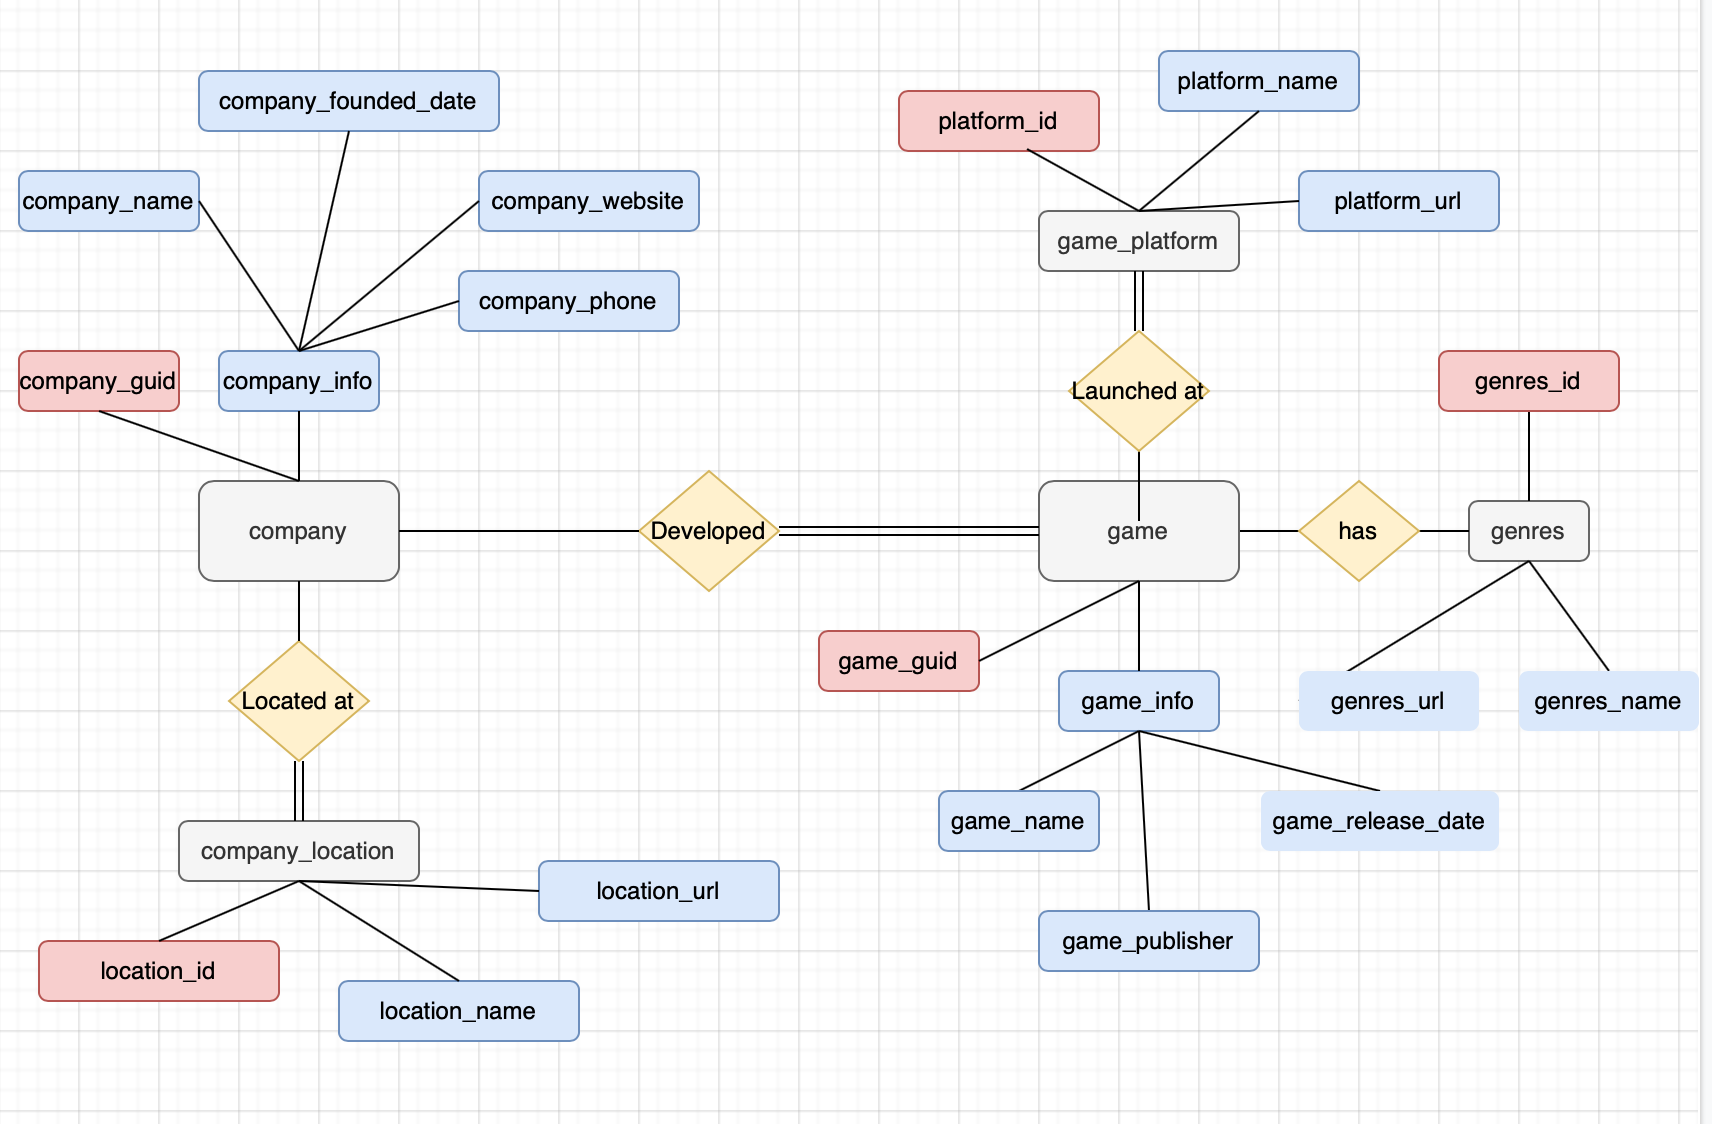

In [90]:
from IPython.display import Image
Image("UML.png")

### Data Auditting

In [51]:
gamelist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 12 columns):
idx                      323 non-null int64
guid                     323 non-null object
name                     323 non-null object
original_release_date    323 non-null object
com_guid                 323 non-null object
publisher                323 non-null object
genres_name              323 non-null object
genres_id                323 non-null object
genres_url               323 non-null object
platform_name            323 non-null object
platform_id              323 non-null object
platform_url             323 non-null object
dtypes: int64(1), object(11)
memory usage: 30.4+ KB


In [54]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 12 columns):
idx                385 non-null int64
guid               385 non-null object
name               385 non-null object
date_founded       385 non-null object
deck               385 non-null object
country            385 non-null object
phone              385 non-null object
website            385 non-null object
location_id        385 non-null int64
location_name      385 non-null object
site_detail_url    385 non-null object
location_count     385 non-null int64
dtypes: int64(3), object(9)
memory usage: 36.2+ KB


There's no null value in the dataset, data cleaning is unnecessary. In real world, the video games has attributes like geners, platforms, etc. What we are collecting contains all the information we needed in the real world, so the dataset is completness. And all the info in the dataset is linked to each other in video game domain, the dataset is consistent.

### Qustions:

* 1):  What are the ranges, data types and format of all of the attributes in your entities?

In [77]:
gamelist_df.dtypes, company_df.dtypes

(idx                       int64
 guid                     object
 name                     object
 original_release_date    object
 com_guid                 object
 publisher                object
 genres_name              object
 genres_id                object
 genres_url               object
 platform_name            object
 platform_id              object
 platform_url             object
 dtype: object, idx                 int64
 guid               object
 name               object
 date_founded       object
 deck               object
 country            object
 phone              object
 website            object
 location_id         int64
 location_name      object
 site_detail_url    object
 location_count      int64
 dtype: object)

* 2): When should you use an entity versus attribute? <br>
When we have many attributes that are only related to one attribute specificly (such as game name, game publisher, game company, game geners are all related to game id)，we should use an entity instead of attributes. 
* 3): When should you use an entity or relationship, and placement of attributes?<br>
When there're many attributes only are linked to several attributes (like genres name, genres url are linked to genres id, platform name, platform url are linked to platform id), we should using relationship to link the entitiies (like using relationship to link game id with platform and genres information) 
* 4): How did you choose your keys? Which are unique?<br>
Keys have to be unique in normal form. We choose game_id as the key of game information, genres_id as the key of genres, platform_id as the key of platform, location_id as the key of company_location, etc.
* 5): Did you model hierarchies using the “ISA” design element? Why or why not? <br>
No, the entities in our dataset don't have subclasses, the entites don't share same attributes so we don't need ISA hierarchies.
* 6): Were there design alternatives? What are their tradeoffs: entity vs. attribute, entity vs.relationship, binary vs. ternary relationships? <br>
In order for populate model in future, we choose geners, platform, company locations to be entities instead of attritbutes

* 7): Where are you going find real-world data populate your model? <br>
We have saved the url of detailed information about the attribute, like platform info url, we could use this url to fetch more detailed information in future to populate our model. Also, we would use method like web scrapper to get data from other resources.
* 8): 1. Are all the tables in 1NF? <br>
Yes
* 9): Are all the tables in 2NF? <br>
Yes
* 10): Are all the tables in 3NF? <br>
Yes

## Report
File generated: game.csv <br>
Code used: game.py <br>
The data of video game information is gathered from giantbomb.com API, both video game company information and video game information are reformatted to satify the requirment of 1st normal form，and loaded into tables at Mysql Server. Next using SQL query to reformat the tables to 2nd NF and 3rd NF. In the end, using pandas.read_sql to audit the data to keep the dataset accurate.

## Conclusion
Primary focus of this assignment is to learn how to load the data into 1st NF, and reformat the data into 2nd NF and 3rd NF to fit the conceptual model we create.

## Contribution                                                                         
We contributed by ourselves: 80%
By External source: 20% 

## Citations
https://blog.csdn.net/qq_30163461/article/details/80080529 <br>
https://blog.csdn.net/u013421629/article/details/77982598 <br>
https://www.giantbomb.com/forums/api-developers-3017/ </br>
